In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/House prise prediction/train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
df.shape

(333, 15)

In [6]:
df.dtypes

,0
ID,int64
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


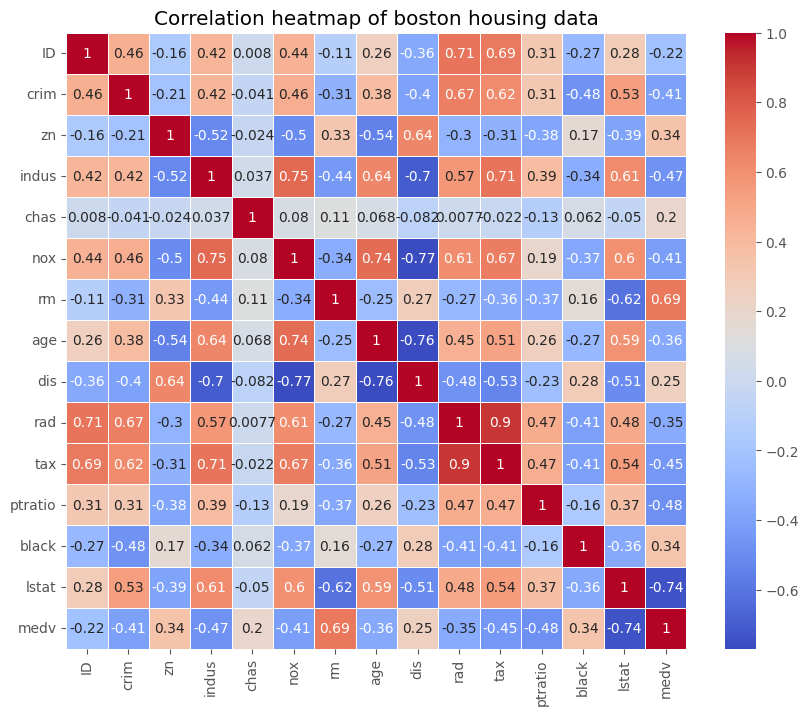

In [30]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize =(10,8))

sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation heatmap of boston housing data')

corr_matrix

In [8]:
df.isna().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [9]:
target_feature = 'medv'

y= df[target_feature]

X= df.drop(target_feature, axis=1)

In [10]:
X.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [11]:
y.head()

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
train_score= round(model.score(X_train, y_train) * 100, 2)
print("Train score of Linear Regression:", train_score)


Train score of Linear Regression: 73.96


In [15]:
test_score = round(model.score(X_test, y_test) * 100, 2)
print("Train score of Linear Regression:", test_score)

Train score of Linear Regression: 70.01


In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 29.439220022863665
R² Score: 0.7001321282647274


In [18]:
round(model.score(X_test, y_test)* 100,2)

70.01

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 5.425792110177431


In [19]:
from sklearn import metrics
print('Mean Absolute Error on TEST DATA of Linear Regression:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error on TEST DATA of Linear Regression:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Squared Error on TEST DATA of Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error on TEST DATA of Linear Regression: 3.736273922640628
Mean Squared Error on TEST DATA of Linear Regression: 29.439220022863665
Mean Squared Error on TEST DATA of Linear Regression: 5.425792110177431


In [20]:
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Variance': y_test - y_pred})
df1.head()

,Actual,Predicted,Variance
304,19.9,17.935055,1.964945
243,50.0,26.179960,23.820040
65,20.6,27.340377,-6.740377
73,19.8,22.670944,-2.870944
327,18.3,17.697139,0.602861


In [21]:
df.head(14)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [22]:
model.predict([[1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.59067572])

In [23]:
model.intercept_

35.90982906044271

In [24]:
model.coef_

array([-4.06368873e-03,  2.19628340e-02,  6.43258604e-02,  5.67841729e-02,
        5.05973586e+00, -1.46010605e+01,  3.35822601e+00, -1.19504803e-03,
       -1.57904962e+00,  2.97187715e-01, -1.04872057e-02, -8.25448987e-01,
        1.06659098e-02, -6.43706933e-01])

In [25]:
lr_coefficient = pd.DataFrame()
lr_coefficient["columns"] = X_train.columns
lr_coefficient['coefficient Estimate'] = pd.Series(model.coef_)
lr_coefficient

,columns,coefficient Estimate
0,ID,-0.004064
1,crim,0.021963
2,zn,0.064326
3,indus,0.056784
4,chas,5.059736
5,nox,-14.601060
6,rm,3.358226
7,age,-0.001195
8,dis,-1.579050
9,rad,0.297188


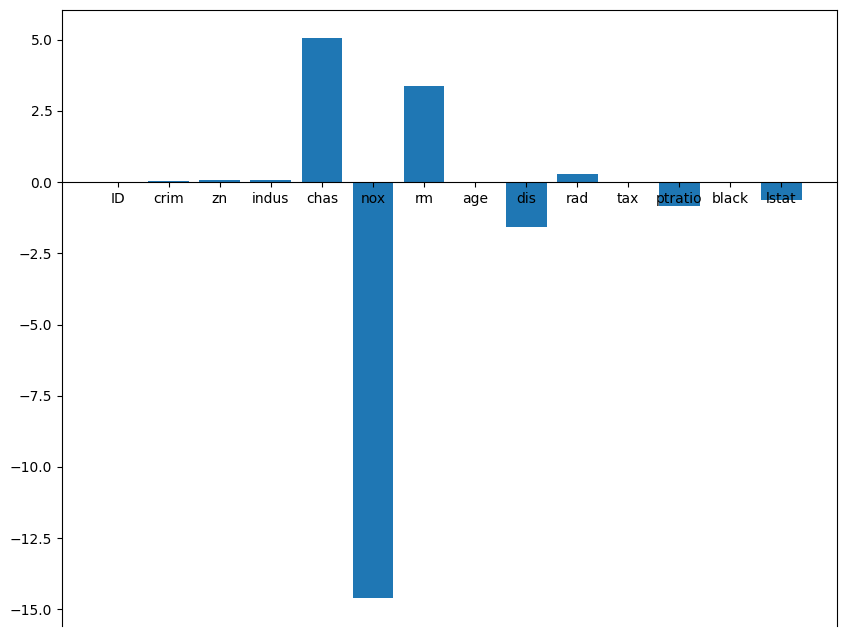

In [26]:
fig, ax = plt.subplots(figsize = (10,8))

ax.bar(lr_coefficient['columns'], lr_coefficient['coefficient Estimate'])
ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

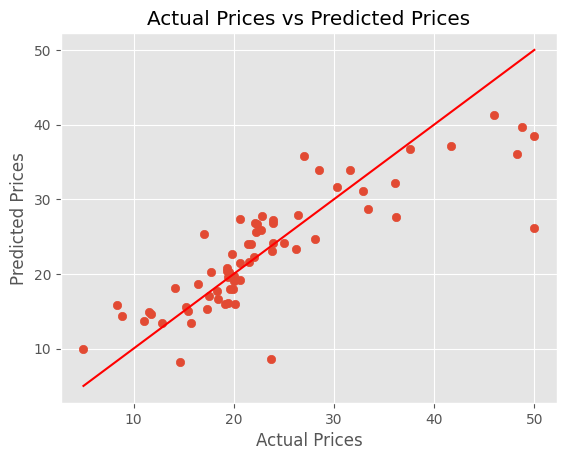

In [27]:
# Visualize Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

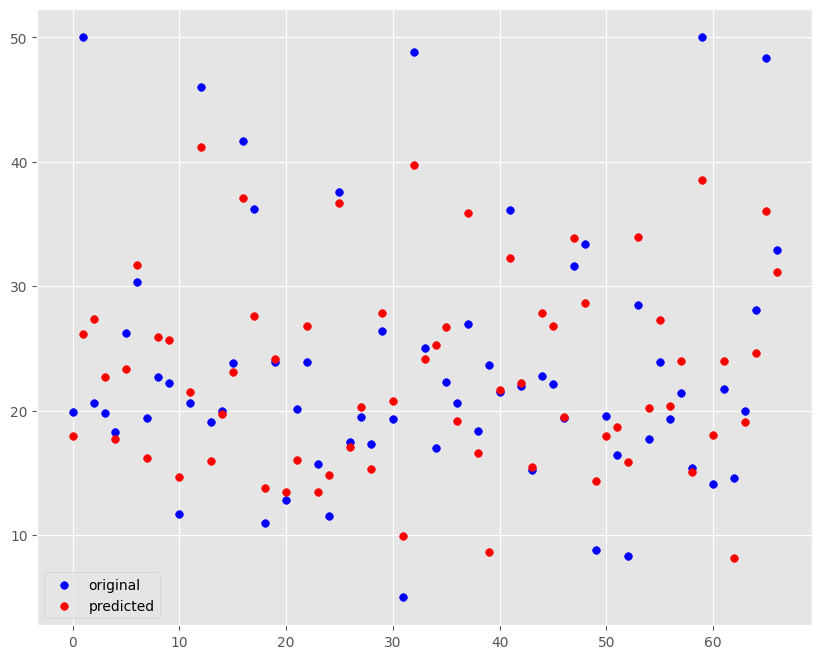

In [28]:
fig, ax = plt.subplots(figsize = (10,8))

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s = 30, color = 'blue', label = 'original')
plt.scatter(x_ax, y_pred, s = 30, color = 'red', label = 'predicted')
plt.legend()
plt.show()

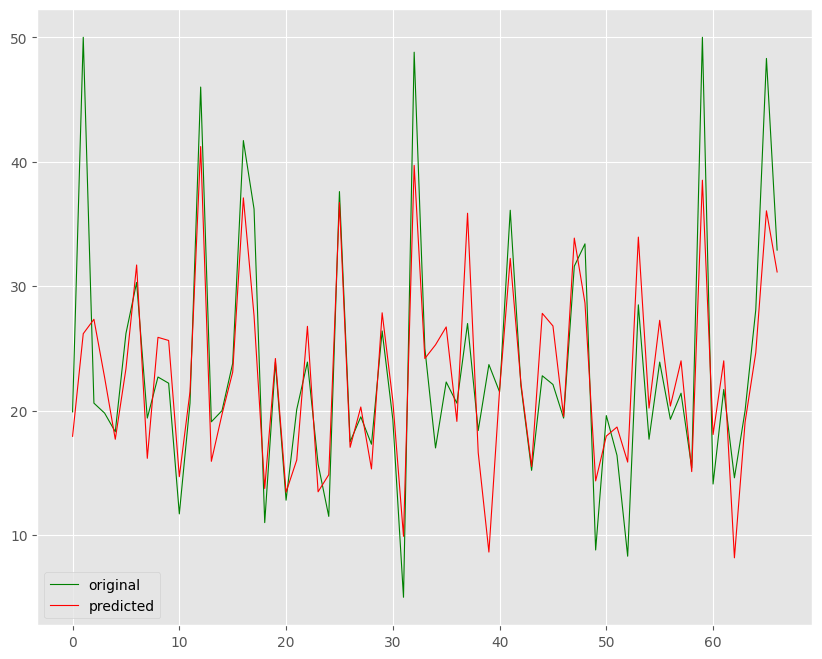

In [29]:
fig, ax = plt.subplots(figsize = (10,8))

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.8, color = 'green', label = 'original')
plt.plot(x_ax, y_pred, lw = 0.8, color = 'red', label = 'predicted')

plt.legend()
plt.show()

COmplete dataset

In [34]:
import pandas as pd

# Load the train and test datasets
train_data = pd.read_csv('/content/drive/MyDrive/House prise prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/House prise prediction/test.csv')

# Display the first few rows of the train and test data to understand their structure
train_data.head(), test_data.head()

(   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
 0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
 
    ptratio   black  lstat  medv  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     18.7  394.63   2.94  33.4  
 3     18.7  396.90   5.33  36.2  
 4     15.2  395.60  12.43  22.9  ,
    ID     crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
 0   3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
 1   6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
 2   8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
 3   9  0.21124  12.5  

In [35]:
# Define features and target for the model
X = train_data.drop(columns=['ID', 'medv'])  # Features
y = train_data['medv']  # Target variable (housing price)

# Split the data into training and validation sets (80% training, 20% validation)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

In [38]:
# Predict on the validation set
y_pred1 = model.predict(X_test1)

In [39]:
# Prepare the test data for prediction (excluding 'ID')
X_test1 = test_data.drop(columns=['ID'])

# Predict housing prices for the test data
test_predictions = model.predict(X_test1)

In [40]:
test_predictions[:5]

array([29.87343505, 24.98355947, 16.85231727,  7.89325745, 16.46303274])

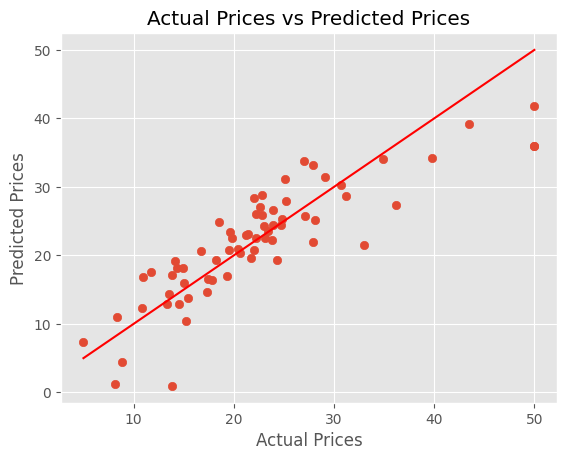

In [41]:
# Visualize Actual vs Predicted Prices
plt.scatter(y_test1, y_pred1)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red')  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

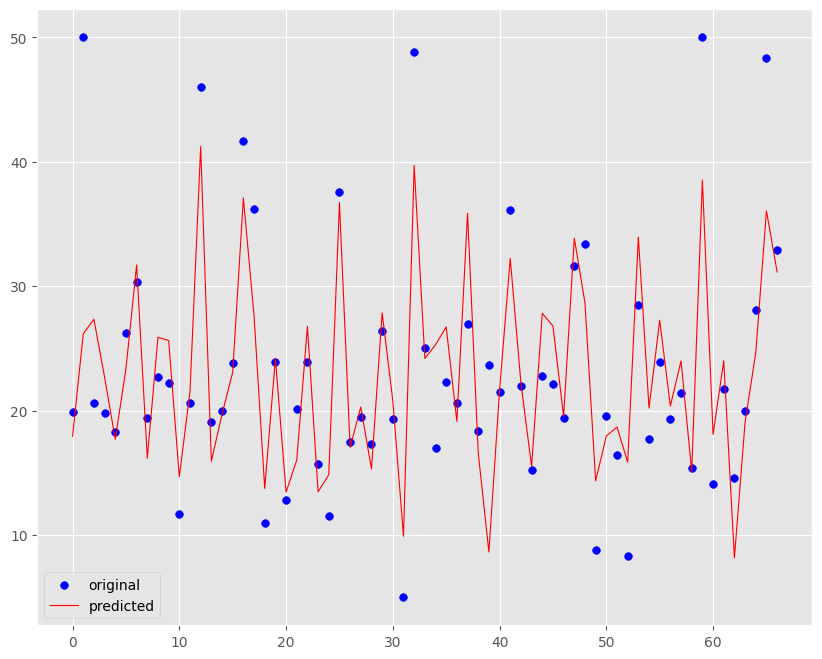

In [42]:
fig, ax = plt.subplots(figsize = (10,8))

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s = 30, color = 'blue', label = 'original')
plt.plot(x_ax, y_pred, lw = 0.8, color = 'red', label = 'predicted')
plt.legend()
plt.show()

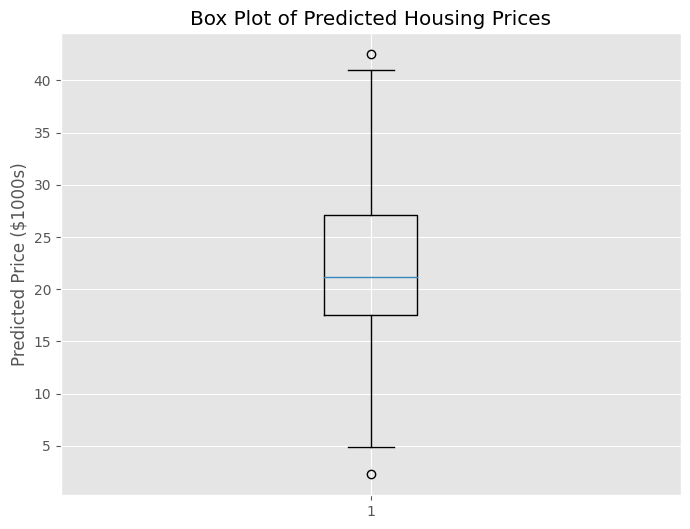

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(test_predictions)
plt.title('Box Plot of Predicted Housing Prices')
plt.ylabel('Predicted Price ($1000s)')
plt.grid(True)
plt.show()